# Notebook by Suryanarayan.B (CB.EN.U4CSE19056)

## Question 1

#### 1) MLP Model

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [10]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
Y_train.shape

(60000,)

In [14]:
Y_test.shape

(10000,)

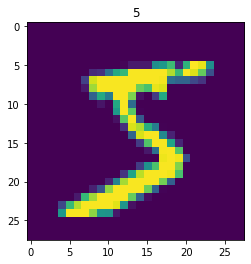

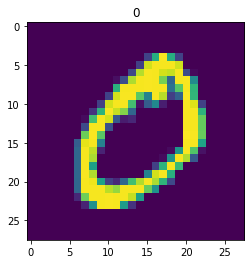

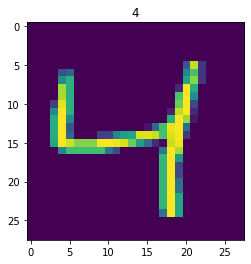

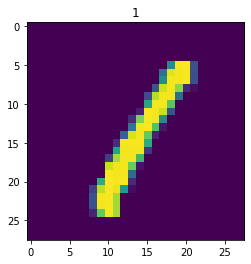

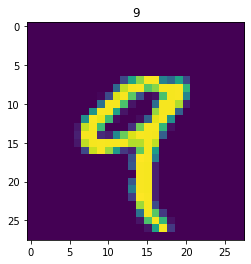

In [15]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.show()

## Printing the shape

In [16]:
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


## Reshaping the data

In [17]:
X_train=X_train.reshape(X_train.shape[0],-1)

In [18]:
X_test=X_test.reshape(X_test.shape[0],-1)

## One hot encoding

In [19]:
Y_train=to_categorical(Y_train)

In [20]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
Y_test=to_categorical(Y_test)

In [22]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Printing Shapes of train and test

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import optimizers

### Here we use 3 hidden layers with 50 neurons and 4 batch normal function after each dense layer and 4 Dropout function after each activation layer.

### Here the optimizer used is adam , kernel_initializer is he_normal and activation function is sigmoid

In [25]:
def in_model(initializer='he_normal'):
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(10,kernel_initializer=initializer))
    model.add(Activation('softmax'))

    ad = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model


In [26]:
model=in_model()


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [28]:
from tensorflow.keras.callbacks import Callback

## Custom callback function
### This function stops the training once accuracy reaches 90% 

In [29]:
class TerminateOnBaseline(Callback):
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [30]:
callback = [TerminateOnBaseline()]

### Training the model

In [31]:
train1=model.fit(X_train,Y_train,validation_split=0.3,epochs=100,callbacks=[callback],verbose=1)

Epoch 1/100
1313/1313 [==============================] - 24s 16ms/step - loss: 1.2775 - accuracy: 0.5902 - val_loss: 0.4666 - val_accuracy: 0.8808
Epoch 2/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.6955 - accuracy: 0.7864 - val_loss: 0.3224 - val_accuracy: 0.9056
Epoch 3/100
1313/1313 [==============================] - 20s 16ms/step - loss: 0.5754 - accuracy: 0.8262 - val_loss: 0.2807 - val_accuracy: 0.9179
Epoch 4/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5133 - accuracy: 0.8481 - val_loss: 0.2528 - val_accuracy: 0.9254
Epoch 5/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4672 - accuracy: 0.8611 - val_loss: 0.2259 - val_accuracy: 0.9346
Epoch 6/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4353 - accuracy: 0.8725 - val_loss: 0.2122 - val_accuracy: 0.9384
Epoch 7/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4042 - accuracy: 0.8812 - val_loss: 0

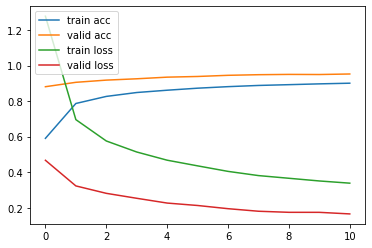

In [32]:
plt.plot(train1.history['accuracy' ])
plt.plot(train1.history['val_accuracy'])
plt.plot(train1.history['loss'])
plt.plot(train1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

### Printing the accuracy

In [33]:
model_out1=model.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_out1[1]*100}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.1565 - accuracy: 0.9538
Test Accuracy is: 95.38000226020813%


In [34]:
print(model.metrics_names) 
print(model_out1)

['loss', 'accuracy']
[0.15651117265224457, 0.9538000226020813]


### Printing Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
def print_conf(model):
    labels=Y_test
    y_pred=model.predict(X_test)
    diffmatrix = confusion_matrix(labels.argmax(axis=1), y_pred.argmax(axis=1))
    return diffmatrix

In [37]:
cm1=print_conf(model)

In [38]:
import seaborn as sns

In [39]:
cm1

array([[ 968,    0,    0,    2,    0,    2,    2,    4,    1,    1],
       [   0, 1123,    0,    2,    1,    2,    2,    1,    4,    0],
       [  12,    2,  974,    9,   10,    0,    5,   13,    6,    1],
       [   1,    1,    7,  965,    1,   21,    0,   11,    3,    0],
       [   2,    0,    1,    1,  940,    0,    7,    2,    3,   26],
       [   8,    1,    1,   16,    2,  840,    6,    3,   11,    4],
       [  13,    2,    1,    0,    3,   13,  922,    0,    4,    0],
       [   3,    9,   15,    7,    1,    0,    0,  979,    1,   13],
       [   7,    6,    4,   14,    7,   25,   10,    9,  886,    6],
       [   5,    6,    0,    8,   18,   22,    0,    8,    1,  941]],
      dtype=int64)

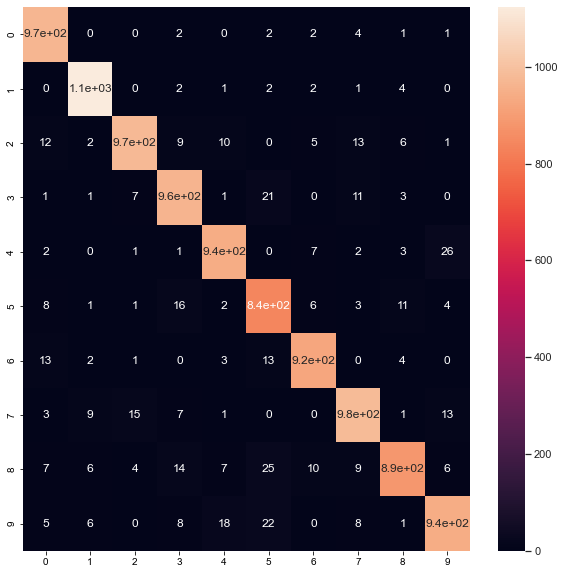

In [40]:
def matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))       
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, ax=ax)

matrix(cm1)

#### 2) Ensemble Learning model using Voting Classifier

In [41]:
y_train=np.argmax(Y_train,axis=1)
y_test=np.argmax(Y_test,axis=1)

In [42]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [43]:
callback1 = [TerminateOnBaseline()]

### Initializing 3 models for Ensemble Learning

In [44]:
emodel1=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1],verbose=1)
emodel2=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1],verbose=1)
emodel3=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1],verbose=1)
emodel1._estimator_type="classifier"
emodel2._estimator_type="classifier"
emodel3._estimator_type="classifier"

In [45]:
ensemble=VotingClassifier(estimators=[('model1',emodel1),('model2',emodel2),('model3',emodel3)],voting='soft')

In [46]:
etrain=ensemble.fit(X_train,y_train)

Epoch 1/100
1313/1313 [==============================] - 21s 15ms/step - loss: 1.3198 - accuracy: 0.5711 - val_loss: 0.4990 - val_accuracy: 0.8661
Epoch 2/100
1313/1313 [==============================] - 19s 14ms/step - loss: 0.7342 - accuracy: 0.7762 - val_loss: 0.3414 - val_accuracy: 0.8962
Epoch 3/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5948 - accuracy: 0.8236 - val_loss: 0.2900 - val_accuracy: 0.9132
Epoch 4/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5165 - accuracy: 0.8467 - val_loss: 0.2486 - val_accuracy: 0.9273
Epoch 5/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4755 - accuracy: 0.8594 - val_loss: 0.2196 - val_accuracy: 0.9363
Epoch 6/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4368 - accuracy: 0.8717 - val_loss: 0.2141 - val_accuracy: 0.9373
Epoch 7/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4117 - accuracy: 0.8780 - val_loss: 0

In [47]:
Y_pred1 = ensemble.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
Y_pred1.shape

(10000,)

### Printing the accuracy

In [49]:
ex1=accuracy_score(y_test,Y_pred1)

In [50]:
print("Test Accuracy is :", ex1*100 ," %")

Test Accuracy is : 96.1  %


### Printing the confusion matrix

In [51]:
cm2=confusion_matrix(y_test, Y_pred1)

In [52]:
cm2

array([[ 967,    0,    1,    1,    2,    3,    4,    1,    1,    0],
       [   0, 1124,    3,    1,    0,    1,    3,    1,    2,    0],
       [   6,    4,  993,    5,    8,    0,    2,    5,    8,    1],
       [   0,    1,   10,  970,    0,    9,    0,   12,    7,    1],
       [   1,    0,    3,    0,  947,    0,    8,    1,    1,   21],
       [   5,    1,    1,   22,    3,  831,   10,    4,   11,    4],
       [   7,    4,    0,    1,    4,    5,  933,    0,    4,    0],
       [   2,   13,   15,    3,    4,    0,    0,  981,    0,   10],
       [   7,    6,    3,    6,    7,    9,    5,    8,  919,    4],
       [   8,    5,    0,    9,   23,    7,    0,    7,    5,  945]],
      dtype=int64)

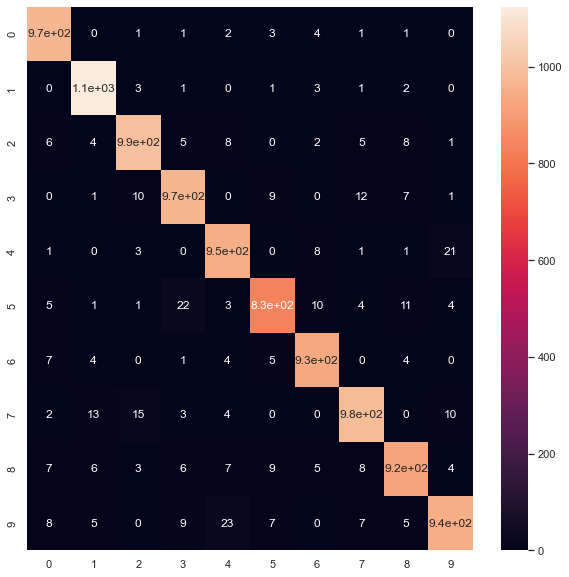

In [53]:
matrix(cm2)

## Question 2

### 1) MLP Model
### Here the dataset used is https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

In [54]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [55]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Splitting the data

In [56]:
X=df.drop('unacc',axis=1)
X

,vhigh,vhigh.1,2,2.1,small,low
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [57]:
Y=df.iloc[:,-1]
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: unacc, Length: 1727, dtype: object

### One-Hot Encoding

In [58]:
X=pd.get_dummies(X)

In [59]:
X=X.values

In [60]:
Y=pd.get_dummies(Y)

In [61]:
Y=Y.values

In [62]:
print(X.shape,Y.shape)

(1727, 21) (1727, 4)


### Train-test-split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [65]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (1157, 21)
Test shape (570, 21)
(1157, 4)
(570, 4)


In [66]:
X_train=np.asarray(X_train).astype(float)

y_train=np.asarray(y_train).astype(float)

### Initializing the NN Model

In [67]:
def car_model(initializer='he_normal'):
    model=Sequential()
    model.add(Dense(50, input_shape = (21,),kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer=initializer))
    model.add(Activation('softmax'))

    ad = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model

In [68]:
cmodel1=car_model()

In [69]:
cmodel1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                1100      
_________________________________________________________________
batch_normalization_16 (Batc (None, 50)                200       
_________________________________________________________________
activation_20 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_17 (Batc (None, 50)                200       
_________________________________________________________________
activation_21 (Activation)   (None, 50)               

### Call back function

In [70]:
callback_c1 = [TerminateOnBaseline()]

### Training the model

In [71]:
ctrain1=cmodel1.fit(X_train,y_train,validation_split=0.3,epochs=100,callbacks=[callback_c1],verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 30ms/step - loss: 1.2413 - accuracy: 0.4400 - val_loss: 1.0090 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 0.9385 - accuracy: 0.6700 - val_loss: 0.9272 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.7890 - accuracy: 0.7046 - val_loss: 0.9071 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 0.7585 - accuracy: 0.7194 - val_loss: 0.8838 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: 0.7269 - accuracy: 0.7182 - val_loss: 0.8213 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 16ms/step - loss: 0.6733 - accuracy: 0.7355 - val_loss: 0.7654 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 16ms/step - loss: 0.6294 - accuracy: 0.7392 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 

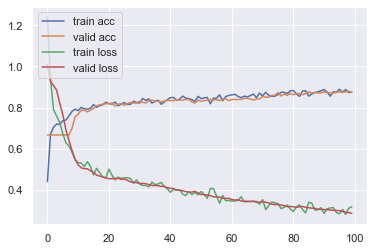

In [73]:
plt.plot(ctrain1.history['accuracy' ])
plt.plot(ctrain1.history['val_accuracy'])
plt.plot(ctrain1.history['loss'])
plt.plot(ctrain1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

### Test Accuracy

In [75]:
cmodel_out1=cmodel1.evaluate(X_test,y_test)
print(f"Test Accuracy is: {cmodel_out1[1]*100}%")

18/18 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.9018
Test Accuracy is: 90.1754379272461%


### Print Confusion Matrix

In [77]:
def cprint_conf(model):
    labels=y_test
    y_pred=model.predict(X_test)
    diffmatrix = confusion_matrix(labels.argmax(axis=1), y_pred.argmax(axis=1))
    return diffmatrix

In [79]:
car_cm1=cprint_conf(cmodel1)

In [80]:
car_cm1

array([[117,   4,   6,   0],
       [  7,  11,   0,   0],
       [ 13,   0, 386,   0],
       [ 13,  13,   0,   0]], dtype=int64)

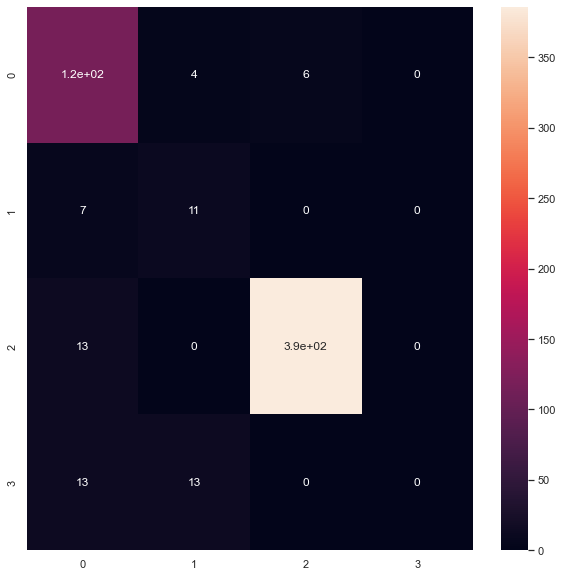

In [81]:
matrix(car_cm1)

### 2) Ensemble Learning model using Voting Classifier

In [82]:
y_train=np.argmax(y_train,axis=1)

In [83]:
y_train

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [84]:
y_test=np.argmax(y_test,axis=1)
y_test

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 2, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 1, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       3, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 1, 3, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

In [97]:
ecallback1 = [TerminateOnBaseline()]

### Intializing 3 models for Ensemble learning

In [98]:
emodel7=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1],verbose=1)
emodel8=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1],verbose=1)
emodel9=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1],verbose=1)
emodel7._estimator_type="classifier"
emodel8._estimator_type="classifier"
emodel9._estimator_type="classifier"

In [99]:
ensemble3=VotingClassifier(estimators=[('model1',emodel7),('model2',emodel8),('model3',emodel9)],voting='soft')

In [100]:
etrain4=ensemble3.fit(X_train,y_train)

Epoch 1/100
26/26 [==============================] - 2s 33ms/step - loss: 1.3295 - accuracy: 0.2991 - val_loss: 1.1008 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 1s 20ms/step - loss: 0.9455 - accuracy: 0.6836 - val_loss: 0.9391 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 1s 20ms/step - loss: 0.8491 - accuracy: 0.7206 - val_loss: 0.9032 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 1s 20ms/step - loss: 0.8025 - accuracy: 0.7108 - val_loss: 0.8804 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 19ms/step - loss: 0.7674 - accuracy: 0.7206 - val_loss: 0.8489 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 19ms/step - loss: 0.7064 - accuracy: 0.7342 - val_loss: 0.7941 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 17ms/step - loss: 0.6671 - accuracy: 0.7194 - val_loss: 0.7430 - val_accuracy: 0.7730
Epoch 

In [93]:
y_pred = ensemble3.predict(X_test)

18/18 [==============================] - 0s 3ms/step


### Test Accuracy

In [95]:
x=accuracy_score(y_test,y_pred)

In [96]:
print("Test Accuracy is :", x*100 ," %")

Test Accuracy is : 89.47368421052632  %


### Confusion Matrix

In [101]:
ecm=confusion_matrix(y_test, y_pred)

In [102]:
ecm

array([[111,   4,  12,   0],
       [  5,  13,   0,   0],
       [ 13,   0, 386,   0],
       [ 10,  16,   0,   0]], dtype=int64)

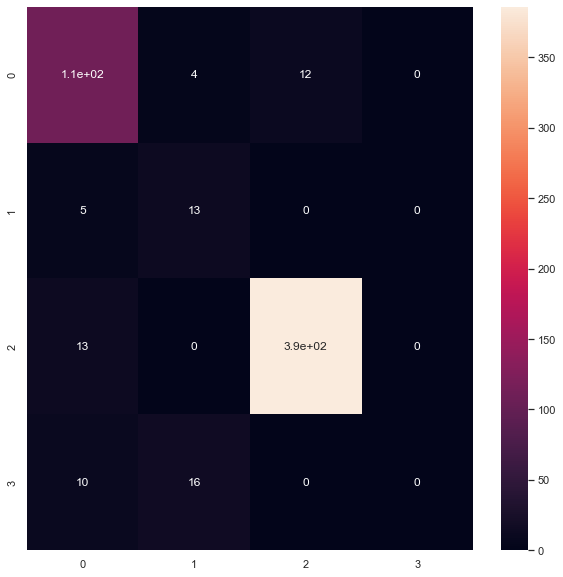

In [103]:
matrix(ecm)

# Inference:

### From the above experiments we infer that ensemble model gives slight or same accuracy compared to baseline MLP model 